In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
#Importing all the libraries
from scipy import signal
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from random import randint
import cv2
import os
import imutils
import pytesseract
from pytesseract import Output
from skimage import util
from os import listdir
import glob
import PIL
from google.colab.patches import cv2_imshow
from skimage import io


In [ ]:
# Importing images from a folder individually and saving it in a variable
info = []
for root, __, files in os.walk("/content/drive/MyDrive/Image Processing/Image"):
  for f in files:
      if f.endswith(".jpg"):
         info.append(io.imread(os.path.join(root, f)))

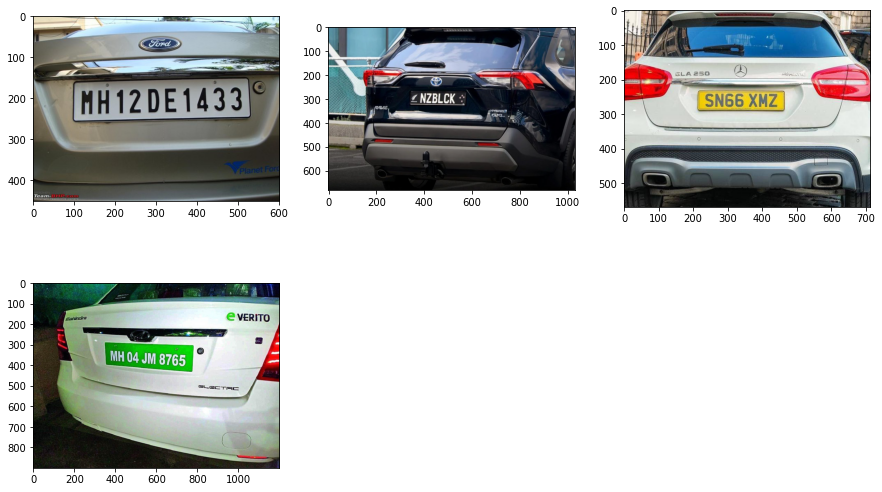

In [ ]:
# Result Display
plt.figure(figsize=(15,9))
for x in range(4):
  plt.subplot(2,3,x+1)
  plt.imshow(info[x])

In [ ]:
# This copy will be later used to show contours
og_image = info.copy()
license = info.copy()
number = og_image.copy()

In [ ]:
# Coverting images to grayscale
for x in range(4):
  license[x] = rgb2gray(license[x])
  license[x] = license[x] * 255

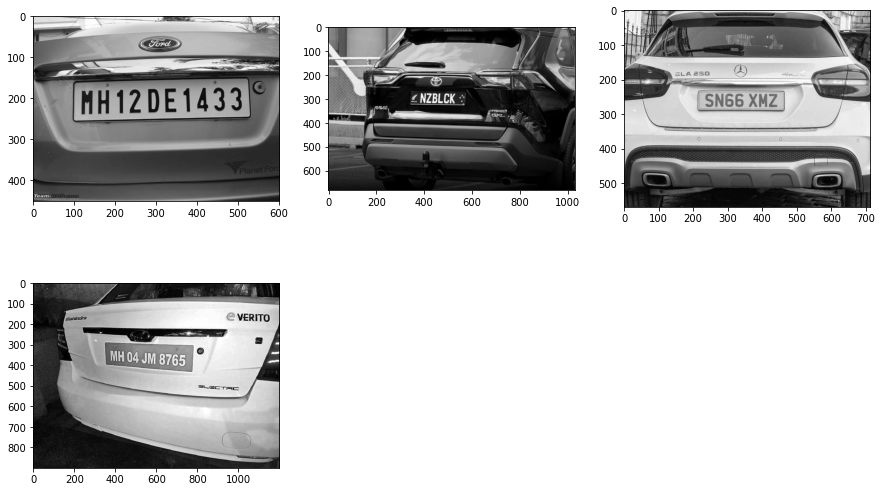

In [ ]:
# Result Display
plt.figure(figsize=(15,9))
for x in range(1,5):
  plt.subplot(2,3,x)
  license[x-1] = np.uint8(license[x-1])
  plt.imshow(license[x-1],cmap = 'gray')

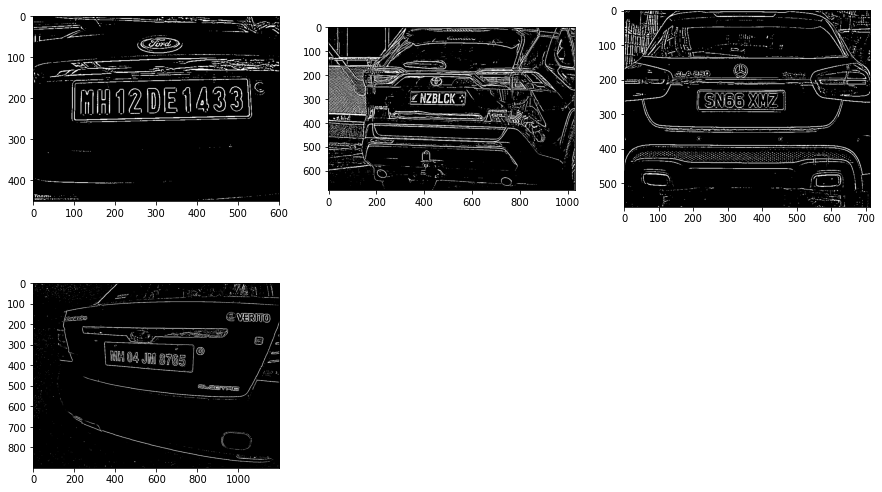

In [ ]:
# Adaptive thresholding is applied on all the images
plt.figure(figsize=(15,9))
for x in range(4):
  if x == 1:
    license[x] = cv2.GaussianBlur(license[x],(3,3),0)
    license[x] = cv2.adaptiveThreshold(license[x],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,-2)
  else:
    license[x] = cv2.GaussianBlur(license[x],(5,5),0)
    license[x] = cv2.adaptiveThreshold(license[x],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,-2)
  plt.subplot(2,3,x+1)
  plt.imshow(license[x],cmap='gray')

**Reason:** Adaptive threshold shows better result of images with unknown contrast and light angles.The Adaptive thresholding method is often used to threshold images with non-uniform lighting or contrast, as it adapts to the local conditions of the image.

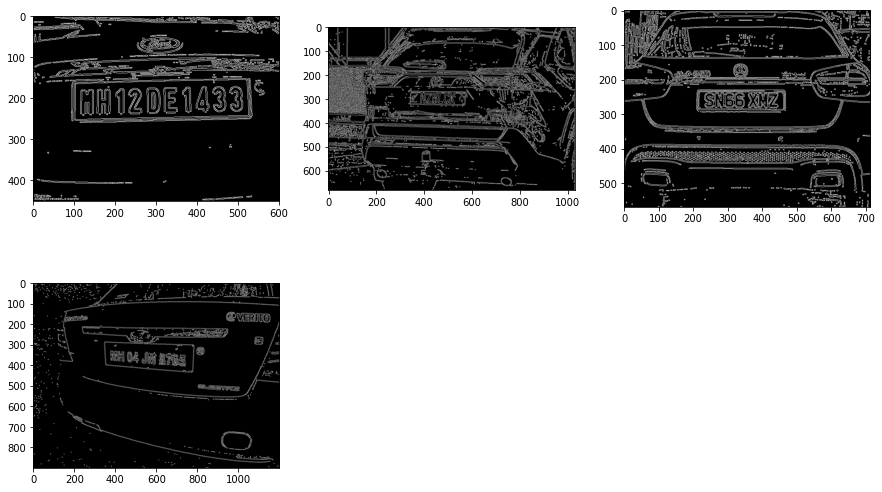

In [ ]:
# Implementation of canny Edge Detection Function
plt.figure(figsize=(15,9))
for x in range(4):
  canny_blur = cv2.GaussianBlur(license[x],(5,5),0)
  canny_edge = cv2.Canny(canny_blur, 30, 200)
  license[x] = canny_edge.copy()
  plt.subplot(2,3,x+1)
  plt.imshow(license[x],cmap = 'gray')

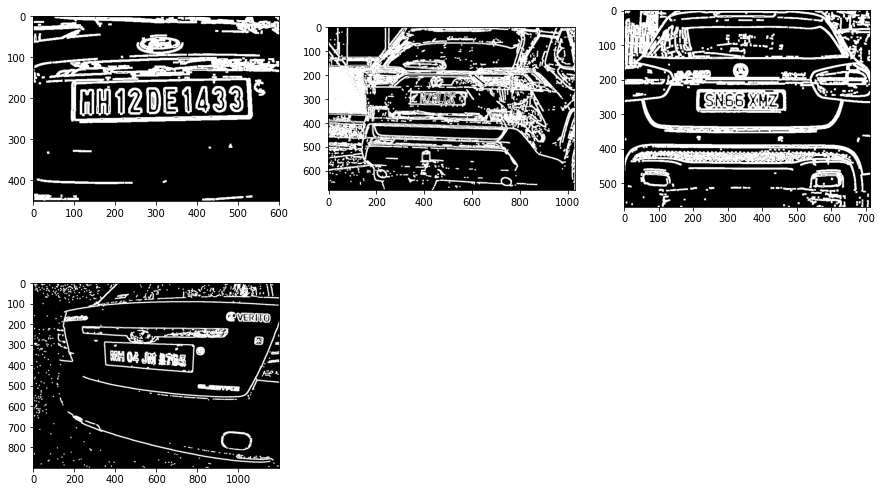

In [ ]:
# Morphological Operations were applied for better quality and visibility of edges
plt.figure(figsize=(15,9))
for x in range(4):
  sh = license[x].shape
  rows = sh[0]
  cols = sh[1]
  sz=3
  se = (np.ones([sz,sz]))*255
  # Closing Operation
  license[x] = cv2.dilate(license[x],se,iterations = 1)
  license[x] = cv2.erode(license[x],se,iterations = 1)
  # Dialation operation
  license[x] = cv2.dilate(license[x],se,iterations = 1)
  plt.subplot(2,3,x+1)
  plt.imshow(license[x],cmap = 'gray')

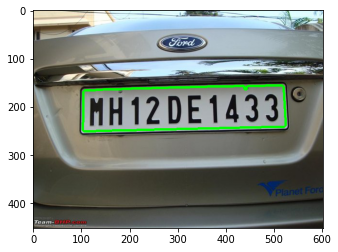

In [ ]:
# Contour Detection
contours = cv2.findContours(license[0].copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
a = cv2.drawContours(og_image[0].copy(), [contours[1]], -1, (0, 255, 0), 3)
plt.imshow(a,cmap = 'gray')

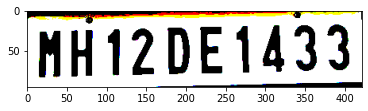

In [ ]:
# Cropping the detected contour
x,y,w,h = cv2.boundingRect(contours[1])
cropped = og_image[0][y:y+h, x:x+w]
x,cropped = cv2.threshold(cropped, 120, 255, cv2.THRESH_BINARY)
plt.imshow(cropped)

In [ ]:
#  Pytesseract for image to string was used for number detection
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(cropped,lang='eng')
print("Number is:" ,text)

Number is: MH12DE1433



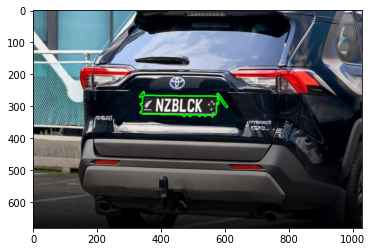

In [ ]:
# Contour Detection
contours = cv2.findContours(license[1].copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
b = cv2.drawContours(og_image[1].copy(), [contours[5]], -1, (0, 255, 0), 3)
plt.imshow(b,cmap = 'gray')

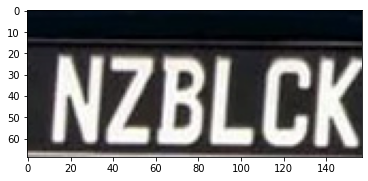

In [ ]:
# Cropping the detected contour
x,y,w,h = cv2.boundingRect(contours[5])
cropped = og_image[1].copy()[y:y+h-10, x+40:x+w-80]
plt.imshow(cropped,cmap = 'gray')

In [ ]:
#  Pytesseract for image to string was used for number detection
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(cropped,lang='eng')
print("Number is:" ,text)

Number is: NZBLCK



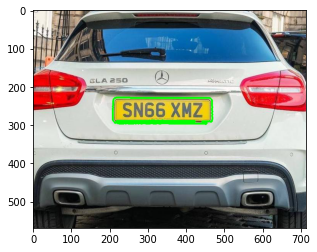

In [ ]:
# Contour Detection
contours = cv2.findContours(license[2].copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
d = cv2.drawContours(og_image[2].copy(), [contours[5]], -1, (0, 255, 0), 3)
plt.imshow(d,cmap = 'gray')

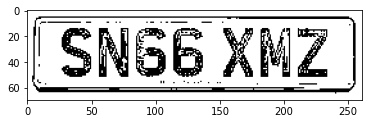

In [ ]:
# Cropping the detected contour
x,y,w,h = cv2.boundingRect(contours[5])
cropped = og_image[2][y:y+h, x:x+w]
x,cropped = cv2.threshold(cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY), 110, 255, cv2.THRESH_BINARY)
plt.imshow(cropped,cmap = 'gray')

In [ ]:
#  Pytesseract for image to string was used for number detection
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(cropped,lang='eng')
print("Number is:" ,text)

Number is:  

SN66 XM



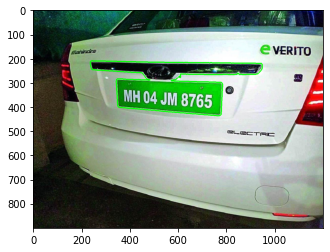

In [ ]:
# Contour Detection
contours = cv2.findContours(license[3].copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
c = cv2.drawContours(og_image[3].copy(), [contours[0]], -1, (0, 255, 0), 3)
plt.imshow(c,cmap = 'gray')

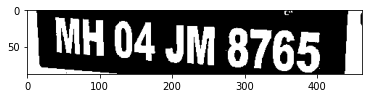

In [ ]:
# Cropping the detected contour
x,y,w,h = cv2.boundingRect(contours[0])
cropped = og_image[3].copy()[y+110:y+h-30, x+100:x+w-150]
x,cropped = cv2.threshold(cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY), 150, 255, cv2.THRESH_BINARY)
plt.imshow(cropped,cmap = 'gray')

In [ ]:
#  Pytesseract for image to string was used for number detection
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(cropped,lang='eng')
print("Number is:" ,text)

Number is: | MH 04 JM 8765 §



**CONCLUSION:** In conclusion, license plate detection using image processing techniques is a crucial task that has numerous practical applications. The use of techniques such as grayscale conversion, adaptive thresholding, Canny edge detection, and morphological operations can help accurately detect and isolate the license plate region, even under challenging conditions.

Moreover, the use of the pytesseract library can help extract the characters from the license plate, allowing for further processing and analysis. However, it is important to note that the accuracy of the license plate detection and character recognition can vary based on various factors such as the quality of the image and the complexity of the background.

Despite these challenges, license plate detection using image processing techniques remains a valuable tool in various fields such as traffic management, surveillance, and security. The continued development of these techniques, coupled with advancements in machine learning and artificial intelligence, can further improve the accuracy and effectiveness of license plate detection and recognition systems.